In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# ANOVA 분석
from statsmodels.stats.anova import anova_lm

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 표준화
from sklearn.preprocessing import StandardScaler
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 트리 시각화
from sklearn.tree import plot_tree
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# GridSearch
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse

# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# numpy 표기방법
np.set_printoptions(precision=6, suppress=True)

### 컬럼 명세
    - MeasDate : 측정일자
    - PM10 : 미세먼지 10ug/m(2)
    - O3 : 오존 농도 (0.151 이상일 경우 매우 나쁨)
    - NO2 : 이산화질소 농도
    - CO : 일산화탄소 농도
    - SO2 : 아황산가스 농도
    - TEMP : 기온(ºC)
    - RAIN : 강수량(mm)
    - WIND : 풍속(m/s)
    - WIND_DIR : 풍향(16방위)
    - HUMIDITY : 습도(%)
    - ATM_PRESS : 현지기압(hPa)
    - SNOW : 적설(cm)
    - CLOUD : 전운량(10분위) (하늘을 덮고 있는 구름의 정도)

In [2]:
df = pd.read_csv('AIR_POLLUTION.csv', parse_dates = ['MeasDate'] )
df.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


In [4]:
df.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


기술통계량 기반으로 단위가 큰 변수와 작은 변수로 구분

In [5]:
x_big = df[['WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'TEMP']]
x_small = df[['O3', 'NO2', 'CO', 'SO2', 'RAIN', 'WIND', 'SNOW', 'CLOUD']]

In [6]:
x_num = df.select_dtypes(exclude='object')
x_obj = df.select_dtypes('object')

<AxesSubplot:>

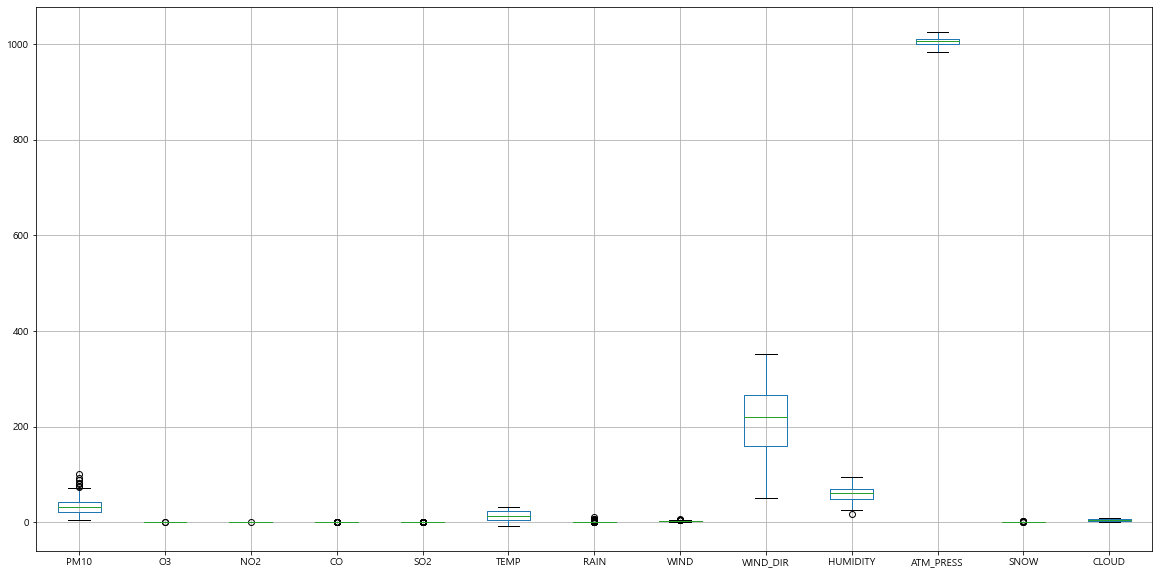

In [7]:
plt.figure(figsize=(20,10))
df.boxplot()

<AxesSubplot:>

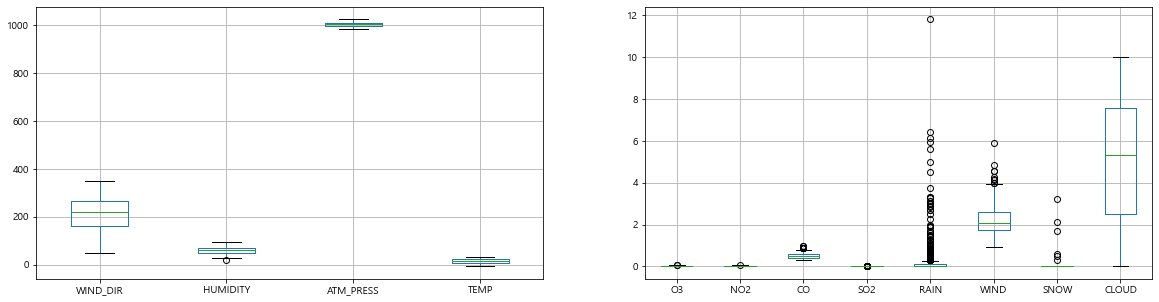

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
x_big.boxplot()
plt.subplot(1,2,2)
x_small.boxplot()

<AxesSubplot:>

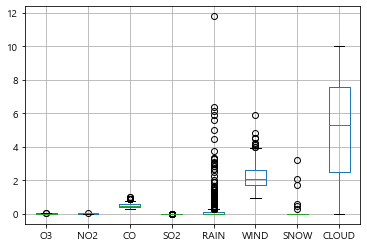

In [13]:
x_small.boxplot()

In [14]:
df.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [73]:
# 결측치 대체
df['PM10'] = df['PM10'].fillna(df.PM10.mean())
df['O3'] = df['O3'].fillna(df.O3.mean())
df['NO2'] = df['NO2'].fillna(df.NO2.mean())
df['CO'] = df['CO'].fillna(df.CO.mean())
df['SO2'] = df['SO2'].fillna(df.SO2.mean())

In [129]:
df.isnull().sum()

MeasDate      0
PM10          0
O3            0
NO2           0
CO            0
SO2           0
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
NO2_d        83
CO_d         30
SO2_d        63
RAIN_d        0
Wind_d        0
dtype: int64

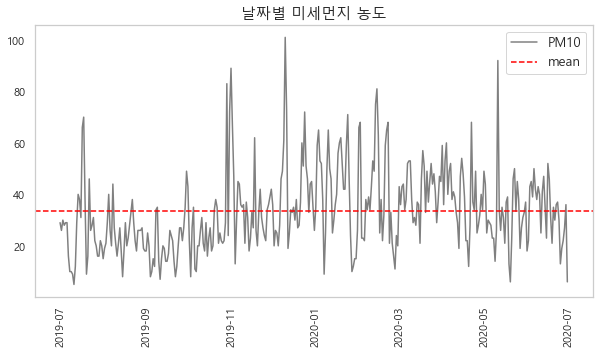

In [130]:
# Date별 미세먼지 농도

plt.figure(figsize=(10,5))
plt.title("날짜별 미세먼지 농도", fontsize=15)
plt.plot(df["MeasDate"], df["PM10"], "-", color='grey', label='PM10')
plt.axhline(y= df['PM10'].mean(), linestyle='--', color='red', label="mean")
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

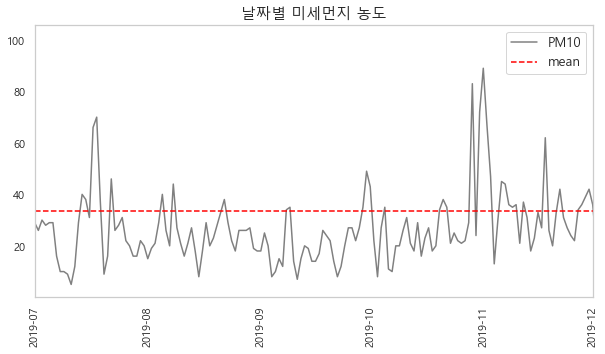

In [132]:
plt.figure(figsize=(10,5))
plt.title("날짜별 미세먼지 농도", fontsize=15)
plt.plot(df["MeasDate"], df["PM10"], "-", color='grey', label='PM10')
plt.axhline(y= df['PM10'].mean(), linestyle='--', color='red', label="mean")
plt.grid()
plt.xlim(['2019-07', '2019-12'])
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

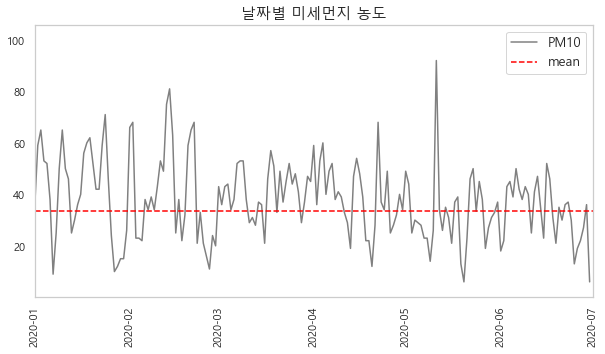

In [134]:
plt.figure(figsize=(10,5))
plt.title("날짜별 미세먼지 농도", fontsize=15)
plt.plot(df["MeasDate"], df["PM10"], "-", color='grey', label='PM10')
plt.axhline(y= df['PM10'].mean(), linestyle='--', color='red', label="mean")
plt.grid()
plt.xlim(['2020-01', '2020-07'])
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='미세먼지 기준', ylabel='count'>

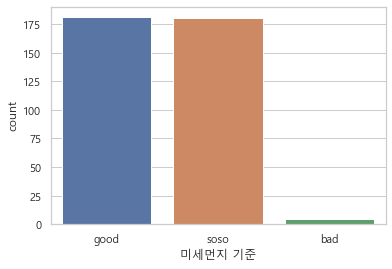

In [136]:
# 미세먼지 
bins = [0,30,80,150]
PM = pd.DataFrame()
PM['미세먼지 기준'] = pd.cut(df['PM10'], bins=bins, labels = ['good', 'soso', 'bad'])
sns.countplot('미세먼지 기준', data=PM)

array([[<AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'CO'}>],
       [<AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'RAIN'}>,
        <AxesSubplot:title={'center':'WIND'}>],
       [<AxesSubplot:title={'center':'WIND_DIR'}>,
        <AxesSubplot:title={'center':'HUMIDITY'}>,
        <AxesSubplot:title={'center':'ATM_PRESS'}>,
        <AxesSubplot:title={'center':'SNOW'}>],
       [<AxesSubplot:title={'center':'CLOUD'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

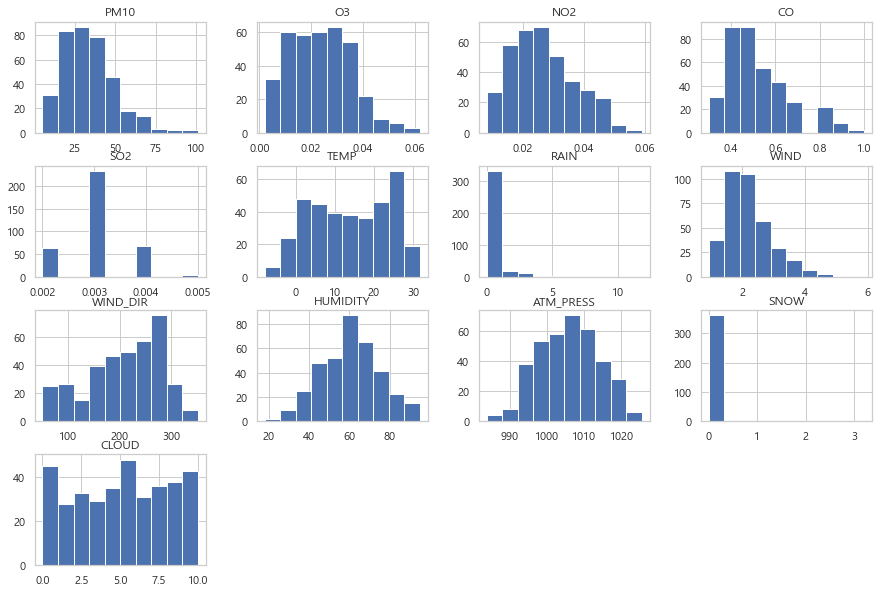

In [92]:
x_num.hist(figsize=(15,10))

In [103]:
# 이산화질소
display(df['NO2'].describe(), df['CO'].describe(), df['SO2'].describe())

count    366.000000
mean       0.026814
std        0.010257
min        0.008000
25%        0.019000
50%        0.025000
75%        0.033750
max        0.059000
Name: NO2, dtype: float64

count    366.000000
mean       0.517042
std        0.140836
min        0.300000
25%        0.400000
50%        0.500000
75%        0.600000
max        1.000000
Name: CO, dtype: float64

count    366.000000
mean       0.003033
std        0.000632
min        0.002000
25%        0.003000
50%        0.003000
75%        0.003000
max        0.005000
Name: SO2, dtype: float64

<AxesSubplot:xlabel='SO2_d', ylabel='count'>

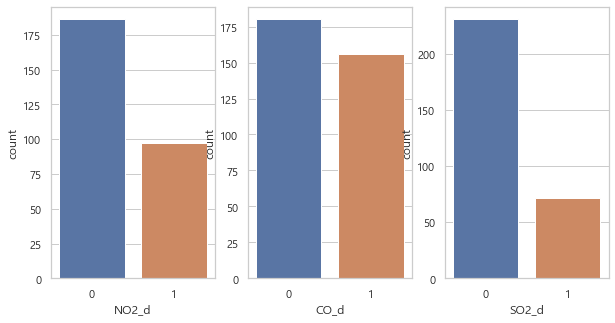

In [109]:
f, ax = plt.subplots(1,3, figsize=(10,5))
# 이산화질소
bins = [0.008,0.025,0.034]
df['NO2_d'] = pd.cut(df['NO2'], bins=bins, labels = [0, 1])
sns.countplot('NO2_d', data=df, ax=ax[0])

# 일산화탄소
bins = [0.3, 0.5,1]
df['CO_d'] = pd.cut(df['CO'], bins=bins, labels = [0, 1])
sns.countplot('CO_d', data=df, ax=ax[1])

# 아황산가스
bins = [0.002, 0.003, 0.005]
df['SO2_d'] = pd.cut(df['SO2'], bins=bins, labels = [0, 1])
sns.countplot('SO2_d', data=df, ax=ax[2])

In [102]:
# ANOVA 검정 결과, P < 0.05로 유의미한 차이가 있음
model = ols('PM10 ~ C(NO2_d)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(NO2_d),1.0,1315.684716,1315.684716,6.532698,0.011115
Residual,282.0,56794.768883,201.399890,NaN,NaN


In [110]:
# ANOVA 검정 결과, P < 0.05로 유의미한 차이가 있음
model = ols('PM10 ~ C(CO_d)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(CO_d),1.0,3271.802626,3271.802626,13.921538,0.000224
Residual,334.0,78495.785157,235.017321,NaN,NaN


In [111]:
# ANOVA 검정 결과, P < 0.05로 유의미한 차이가 있음
model = ols('PM10 ~ C(SO2_d)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(SO2_d),1.0,9570.938946,9570.938946,48.039396,2.546989e-11
Residual,301.0,59968.544273,199.231044,NaN,NaN


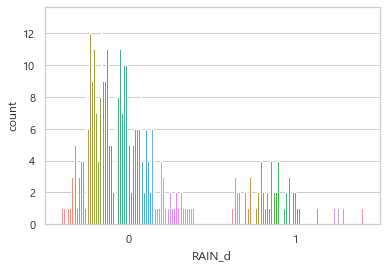

In [121]:
df['RAIN_d'] = np.where(df['RAIN'] < np.mean(df['RAIN']), 0, 1)
sns.countplot(x = 'RAIN_d', hue = 'PM10', data=df)
plt.legend([],[], frameon=False)

In [124]:
# ANOVA 검정 결과, P < 0.05로 유의미한 차이가 있음
model = ols('PM10 ~ C(RAIN_d)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(RAIN_d),1.0,2119.806677,2119.806677,8.540869,0.003689
Residual,364.0,90343.217980,248.195654,NaN,NaN


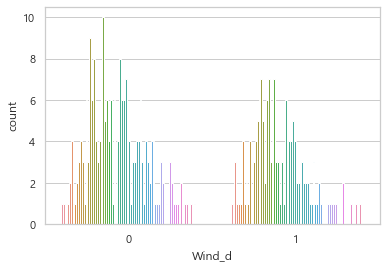

In [125]:
df['Wind_d'] = np.where(df['WIND'] < np.mean(df['WIND']), 0, 1)
sns.countplot(x = 'Wind_d', hue = 'PM10', data=df)
plt.legend([],[], frameon=False)

In [126]:
# ANOVA 검정 결과, P > 0.05로 풍속 크기가 미세먼지 변화에 유의미하다고 볼 수 없음
model = ols('PM10 ~ C(Wind_d)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Wind_d),1.0,898.358125,898.358125,3.571272,0.059582
Residual,364.0,91564.666532,251.551282,NaN,NaN


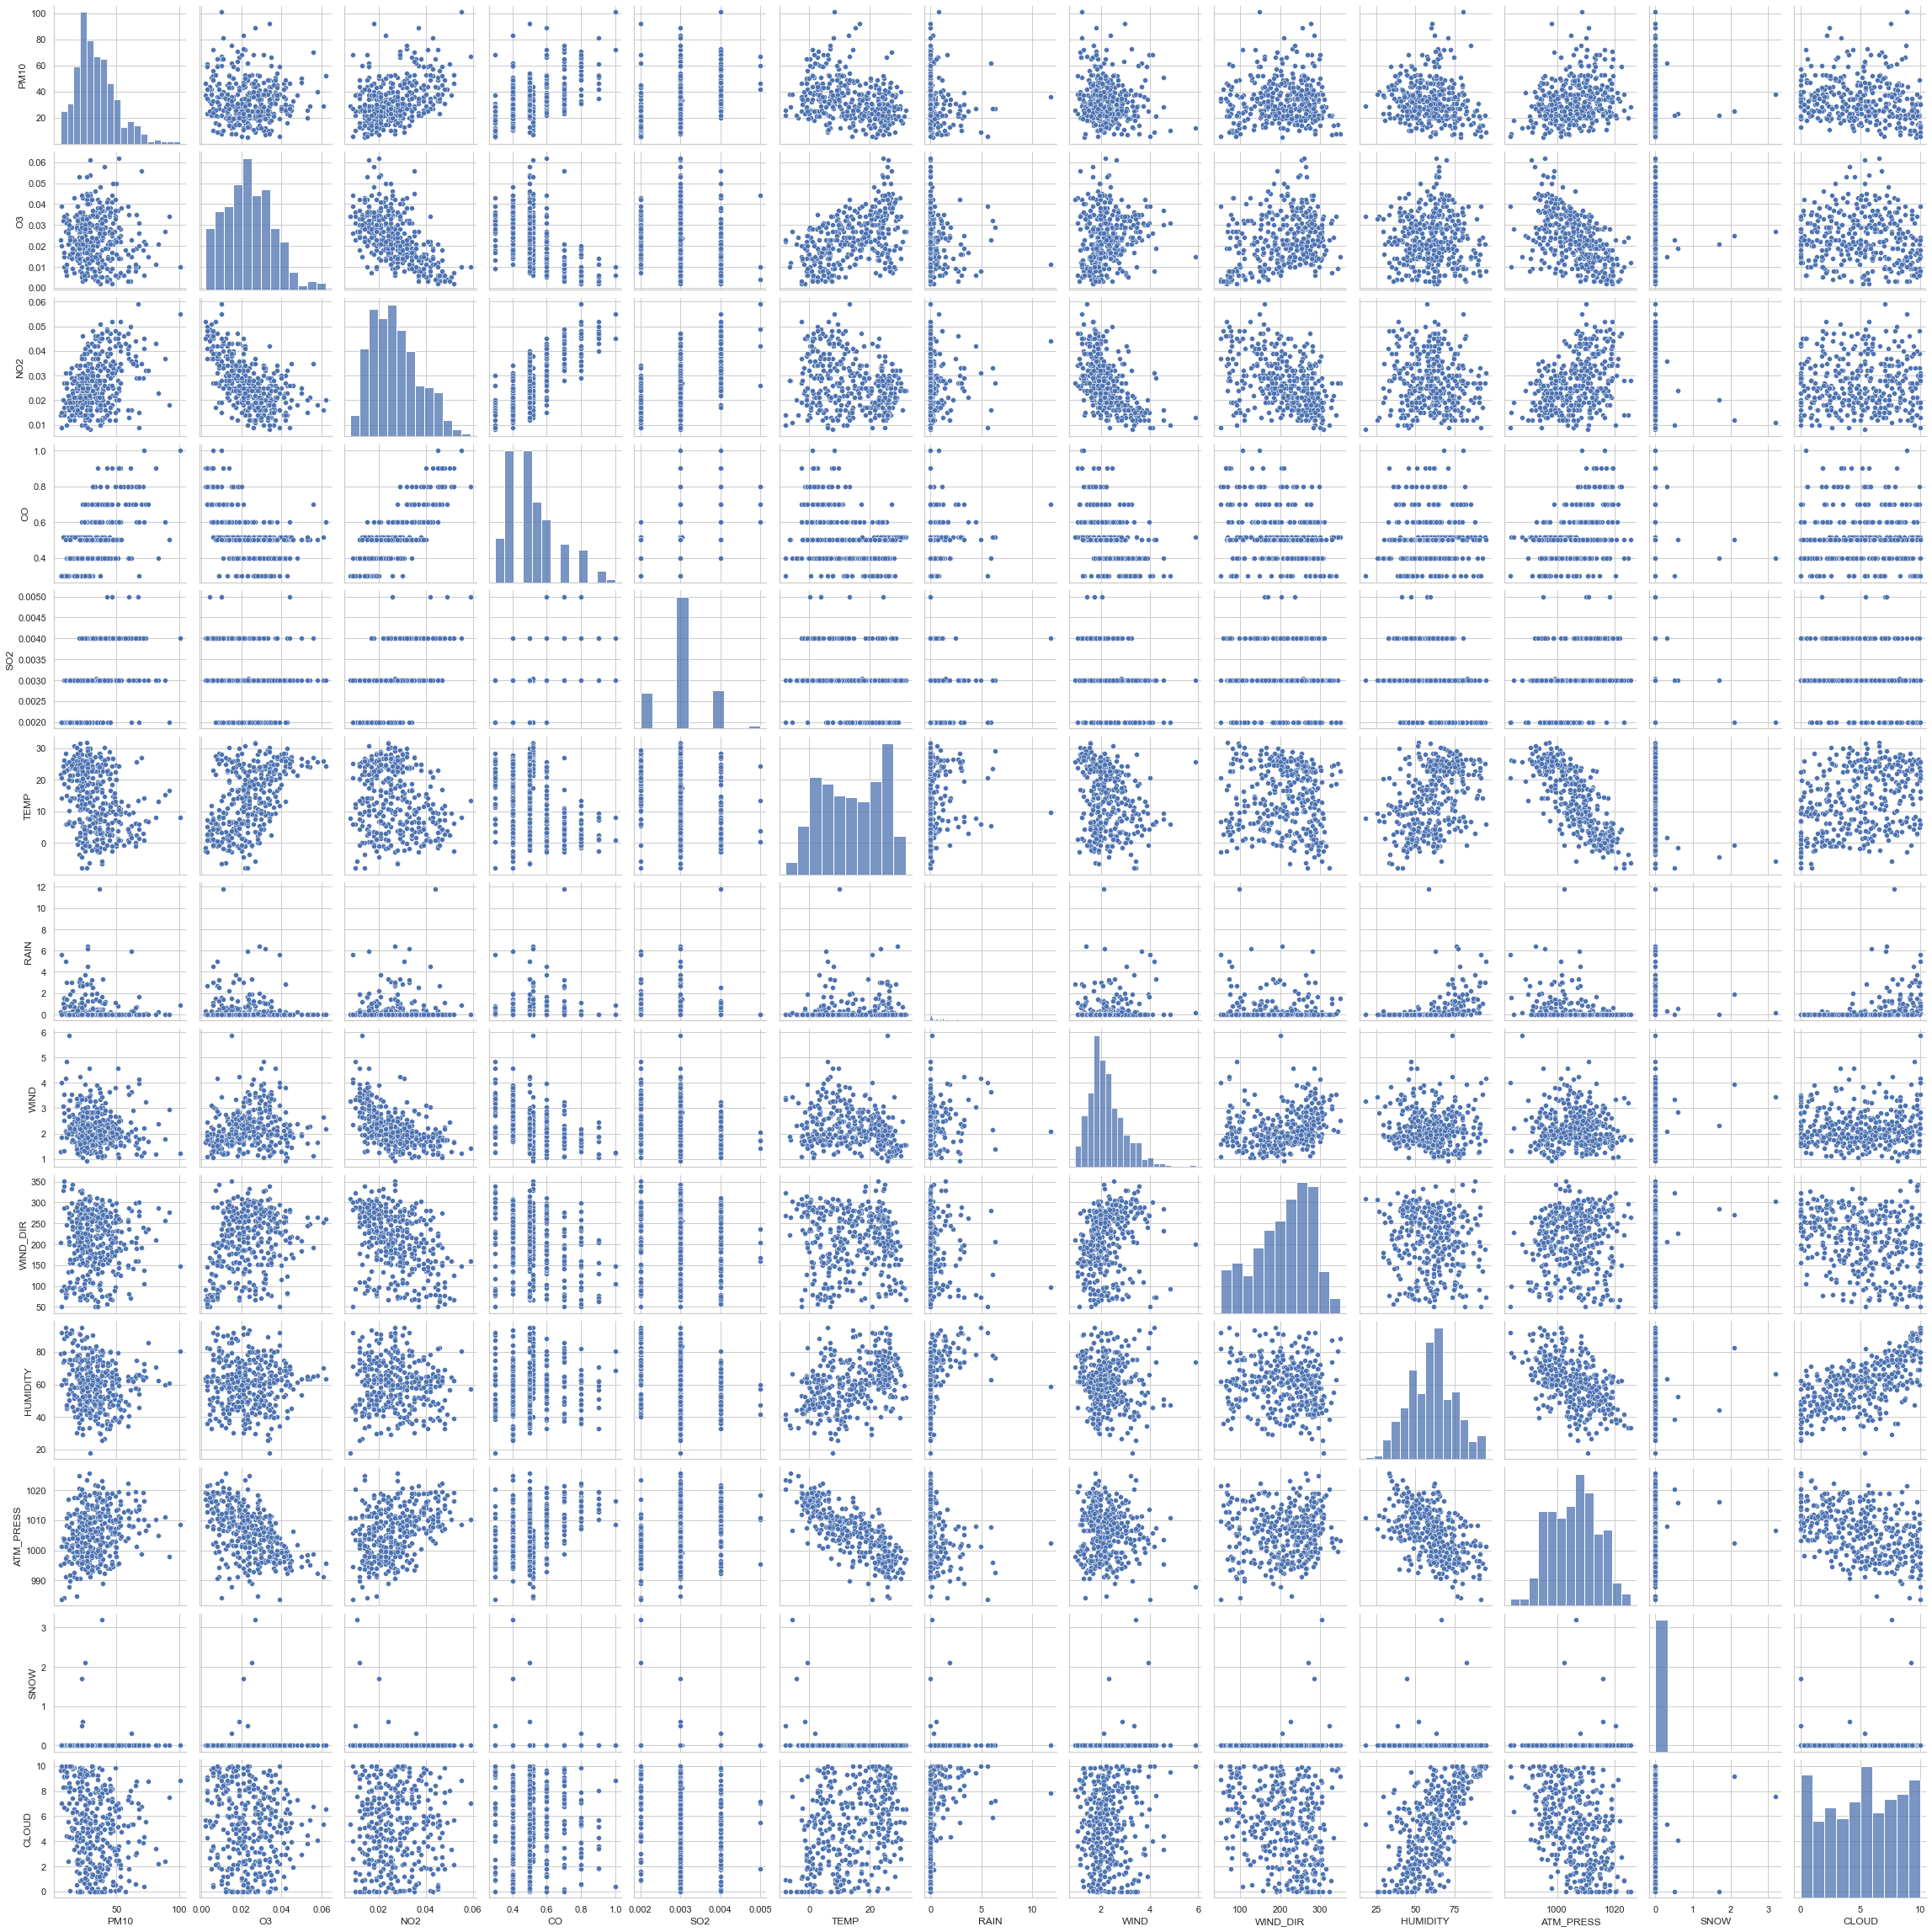

In [18]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df, height = 2.5)
plt.show()

In [19]:
reg_model = smf.ols(formula = 'PM10 ~ O3 + NO2 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + SNOW + CLOUD', data=df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     29.32
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           4.88e-46
Time:                        02:35:15   Log-Likelihood:                -1405.1
No. Observations:                 366   AIC:                             2836.
Df Residuals:                     353   BIC:                             2887.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    433.3944    162.419      2.668      0.0

In [20]:
# 다중공선성 확인
df_x = df.drop(['PM10', 'MeasDate'], axis = 1)
df_x_const = add_constant(df_x) 

df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
11,SNOW,1.112
6,RAIN,1.348
8,WIND_DIR,1.501
4,SO2,1.941
7,WIND,1.943
12,CLOUD,2.093
9,HUMIDITY,2.659
1,O3,2.691
3,CO,3.577
5,TEMP,4.498


In [21]:
scaler = StandardScaler()
cols = df_x.columns
np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns=cols)

df_scaled['PM10'] = df['PM10']
reg_model_scaled = smf.ols(formula = 'PM10 ~ O3 + NO2 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + SNOW + CLOUD', data=df_scaled)

reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     29.32
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           4.88e-46
Time:                        02:35:15   Log-Likelihood:                -1405.1
No. Observations:                 366   AIC:                             2836.
Df Residuals:                     353   BIC:                             2887.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4219      0.599     55.826      0.0

In [22]:
df_y = df['PM10']
df_scaled_x = df_scaled.drop('PM10', axis=1)

model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_scaled_x, df_y)

selected_cols = df_scaled_x.columns[rfe.support_]
removed_cols = df_scaled_x.columns[~rfe.support_]

print('Selected Variables : {}'.format(selected_cols))
print('Removed Variables : {}'.format(removed_cols))

Selected Variables : Index(['O3', 'NO2', 'CO', 'TEMP', 'ATM_PRESS'], dtype='object')
Removed Variables : Index(['SO2', 'RAIN', 'WIND', 'WIND_DIR', 'HUMIDITY', 'SNOW', 'CLOUD'], dtype='object')


In [23]:
rfe_reg_model = smf.ols(formula = 'PM10 ~ O3 + NO2 + CO + TEMP + ATM_PRESS', data=df_scaled)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     60.82
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           7.76e-46
Time:                        02:35:15   Log-Likelihood:                -1419.6
No. Observations:                 366   AIC:                             2851.
Df Residuals:                     360   BIC:                             2875.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4219      0.617     54.189      0.0

<AxesSubplot:>

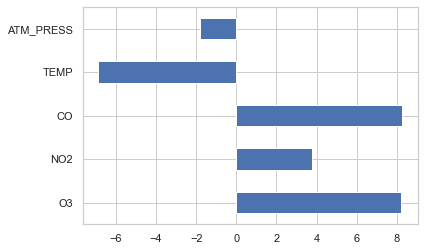

In [24]:
df_reg_coef = pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y='Coef', legend = False)

In [25]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

In [89]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : -0.191


In [93]:
para_leaf = [n_leaf*1 for n_leaf in range(1,20)]
para_depth = [depth for depth in range(1,10)]
para_split = [n_split * 2 for n_split in range(2,20)]

# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=7, max_features='sqrt',
                      min_samples_leaf=15, min_samples_split=12)

best parameter: 
{'criterion': 'mae', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 12}

best score: 
0.352


In [26]:
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1,11)]

Text(0.5, 1.0, 'max_depth')

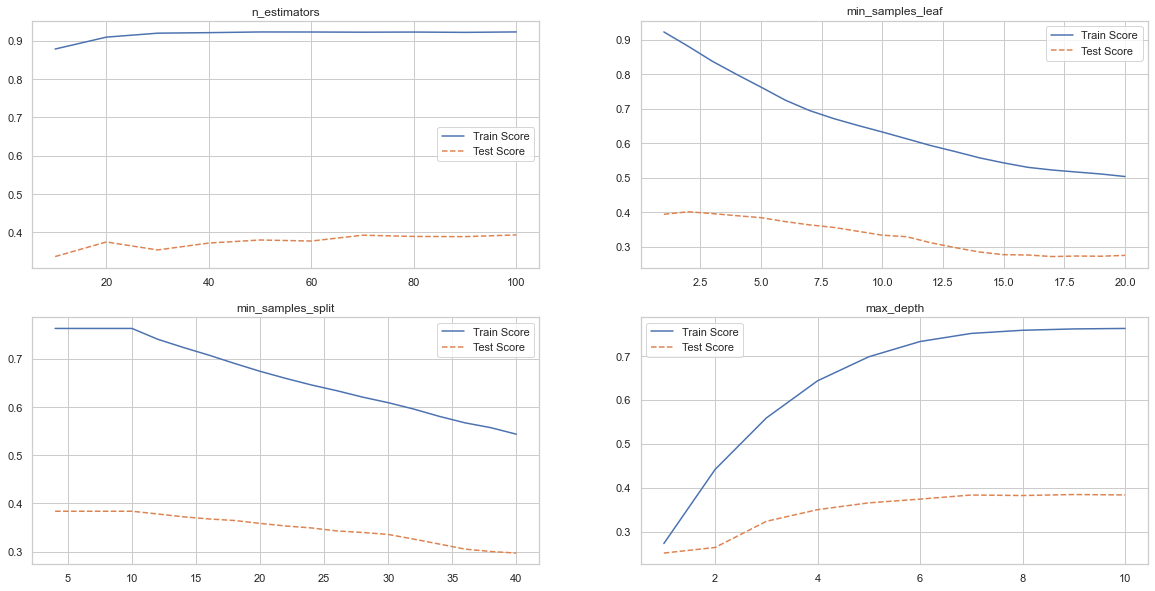

In [38]:
train_score = []; test_score = []

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.figure(figsize=(20,10))    
plt.subplot(2,2,1)    
plt.plot(para_n_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('n_estimators')

# --------------
train_score = []; test_score = []

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.subplot(2,2,2)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_leaf')

# --------------
train_score = []; test_score = []

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf=5, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.subplot(2,2,3)
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_split')

# --------------
train_score = []; test_score = []
for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf=5, min_samples_split = 10, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

plt.subplot(2,2,4)    
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('max_depth')

Text(0.5, 1.0, 'max_depth')

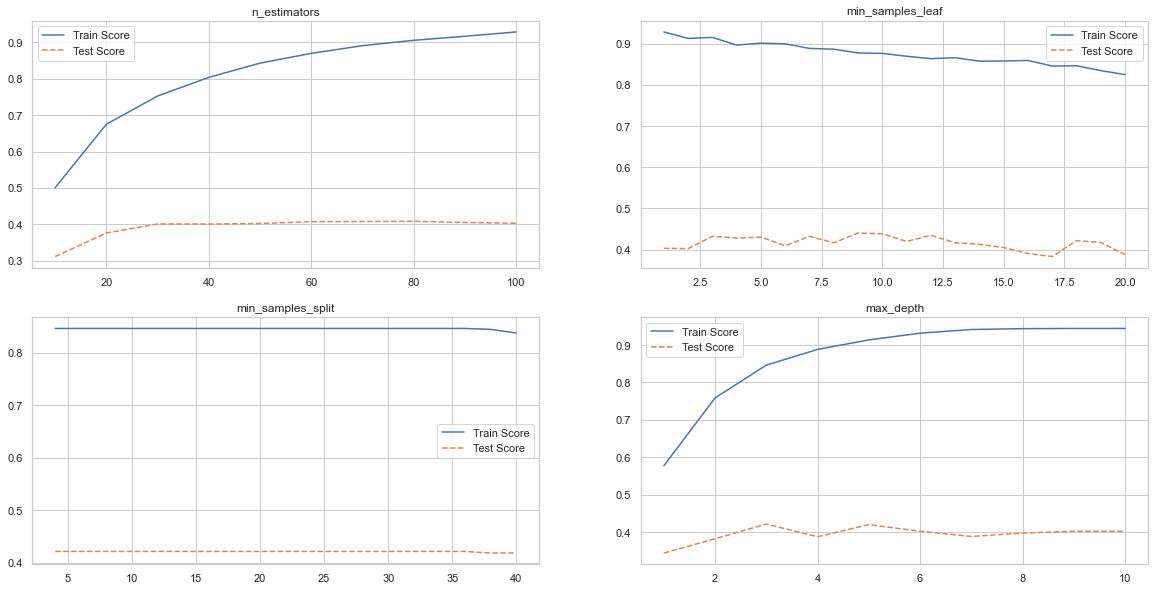

In [41]:
# 그래디언트 부스팅 하이퍼 파라미터 조정

train_score = []; test_score = []

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.figure(figsize=(20,10))    # 시각화를 통해 최적 값 도출
plt.subplot(2,2,1)    
plt.plot(para_n_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('n_estimators')

# --------------
train_score = []; test_score = []

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.subplot(2,2,2)
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_leaf')

# --------------
train_score = []; test_score = []

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf=18, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.subplot(2,2,3)
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('min_samples_split')

# --------------
train_score = []; test_score = []
for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf=18, min_samples_split = 10, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.subplot(2,2,4)    
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.legend()
plt.title('max_depth')

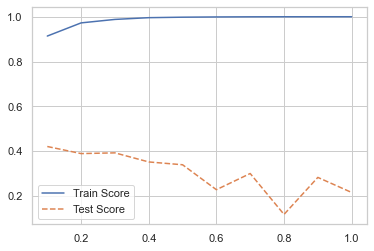

In [42]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1,11)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 18, min_samples_split = 10, max_depth = 5, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

plt.plot(para_lr, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle='--', label = 'Test Score')
plt.legend()

In [56]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

lr_model = smf.ols(formula = 'PM10 ~ O3 + NO2 + CO + TEMP + ATM_PRESS', data = df)
lr_result = lr_model.fit()

dt_model = DecisionTreeRegressor(max_depth=7, max_features='sqrt',
                      min_samples_leaf=15, min_samples_split=12)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 5, min_samples_split = 10, max_depth =10)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 18, min_samples_split = 10, max_depth = 5, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=18,
                          min_samples_split=10, random_state=1234)

In [57]:
models = ['회귀분석', '의사결정나무', '랜덤포레스트', '그래디언트 부스팅']
mse, rmse, mae, mape = [],[],[],[]

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [58]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [59]:
rf_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [60]:
gb_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

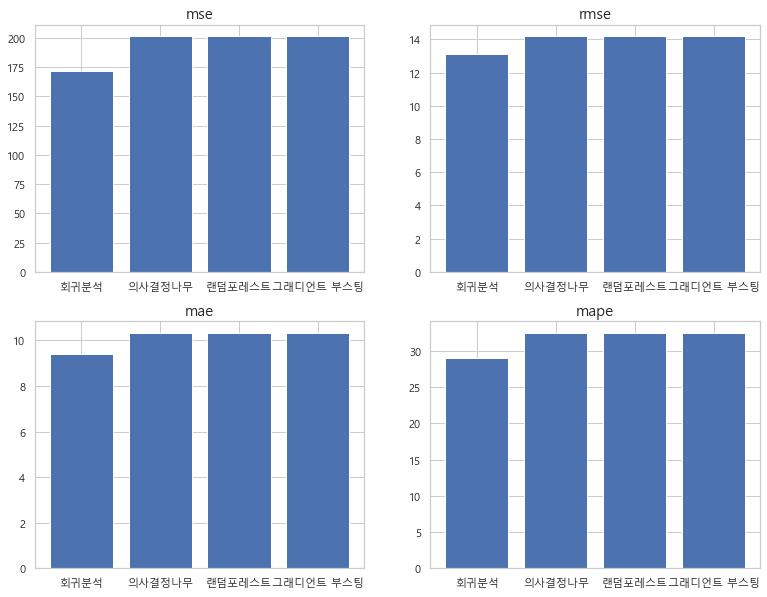

In [61]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

Text(0, 0.5, '변수')

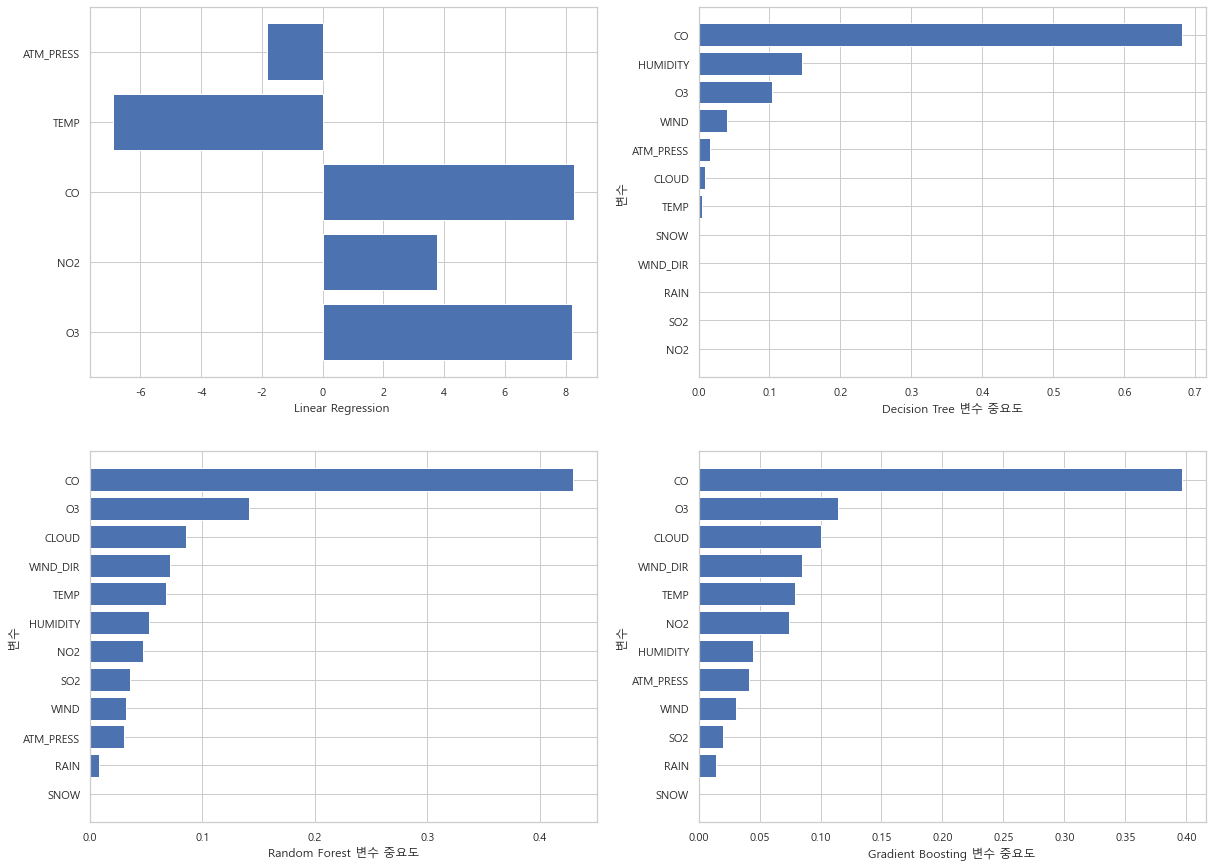

In [72]:
v_feature_name = df_train_x.columns

dt_importance = pd.DataFrame()
dt_importance['Feature'] = v_feature_name
dt_importance['Importance'] = dt_model.feature_importances_
dt_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(dt_importance))

rf_importance = pd.DataFrame()
rf_importance['Feature'] = v_feature_name
rf_importance['Importance'] = rf_model.feature_importances_
rf_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(rf_importance))

gb_importance = pd.DataFrame()
gb_importance['Feature'] = v_feature_name
gb_importance['Importance'] = gb_model.feature_importances_
gb_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(gb_importance))


plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.barh(df_reg_coef.index, df_reg_coef['Coef'])
plt.xlabel('Linear Regression ')

plt.subplot(2,2,2)
plt.barh(y = coordinates, width = dt_importance['Importance'])
plt.yticks(coordinates, dt_importance['Feature'])
plt.xlabel('Decision Tree 변수 중요도')
plt.ylabel('변수')

plt.subplot(2,2,3)
plt.barh(y = coordinates, width = rf_importance['Importance'])
plt.yticks(coordinates, rf_importance['Feature'])
plt.xlabel('Random Forest 변수 중요도')
plt.ylabel('변수')

plt.subplot(2,2,4)
plt.barh(y = coordinates, width = gb_importance['Importance'])
plt.yticks(coordinates, gb_importance['Feature'])
plt.xlabel('Gradient Boosting 변수 중요도')
plt.ylabel('변수')